In [1]:
# Motivation: https://github.com/sharmaroshan/MNIST-Using-K-means

In [2]:
import sys
import sklearn
import matplotlib
import numpy as np

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [4]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [5]:
import matplotlib.pyplot as plt

# python magic function
%matplotlib inline

C:\Users\jvjamesx\AppData\Local\Temp\ipykernel_31492\140264990.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


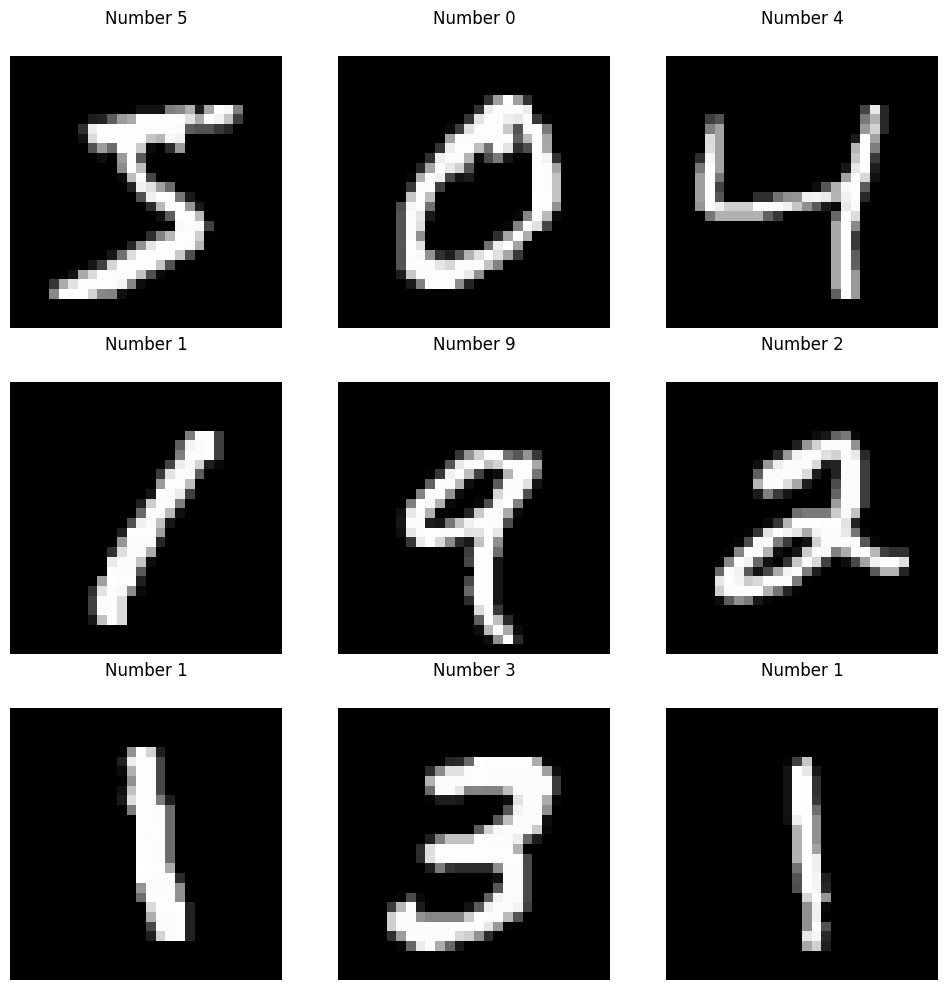

In [6]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
fig.show()

In [7]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [8]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


,n_clusters,10
,init,'k-means++'
,max_iter,100
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,None
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,'auto'


In [9]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [10]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[3 0 4 1 7 8 1 3 1 8 3 1 3 6 1 7 6 8 6 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [11]:
# Optimizing and Evaluating the Clustering Algorithm
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

Number of Clusters: 10
Inertia: 2394796.106541466
Homogeneity: 0.4595195956581415
[(np.uint8(0), 5923), (np.uint8(1), 6742), (np.uint8(2), 5958), (np.uint8(3), 6131), (np.uint8(4), 5842), (np.uint8(5), 5421), (np.uint8(6), 5918), (np.uint8(7), 6265), (np.uint8(8), 5851), (np.uint8(9), 5949)]
[(np.uint8(0), 6444), (np.uint8(1), 10619), (np.uint8(2), 6297), (np.uint8(3), 7885), (np.uint8(6), 5571), (np.uint8(7), 3409), (np.uint8(8), 6719), (np.uint8(9), 13056)]
Accuracy: 0.5541333333333334

Number of Clusters: 16
Inertia: 2211191.4917809414
Homogeneity: 0.552416017828102
[(np.uint8(0), 5923), (np.uint8(1), 6742), (np.uint8(2), 5958), (np.uint8(3), 6131), (np.uint8(4), 5842), (np.uint8(5), 5421), (np.uint8(6), 5918), (np.uint8(7), 6265), (np.uint8(8), 5851), (np.uint8(9), 5949)]
[(np.uint8(0), 5352), (np.uint8(1), 10568), (np.uint8(2), 4114), (np.uint8(3), 5971), (np.uint8(5), 3646), (np.uint8(6), 7176), (np.uint8(7), 7870), (np.uint8(8), 6708), (np.uint8(9), 8595)]
Accuracy: 0.6325833333

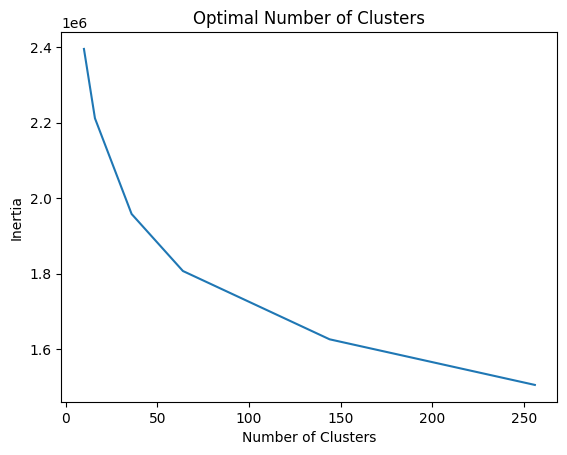

In [12]:
import collections
clusters = [10, 16, 36, 64, 144, 256]

inertia = []
# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    inertia.append(estimator.inertia_)

    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    print(sorted(collections.Counter(Y).items()))
    print(sorted(collections.Counter(predicted_Y).items()))
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

plt.plot(clusters, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title("Optimal Number of Clusters")
plt.show()

In [13]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.8967



C:\Users\jvjamesx\AppData\Local\Temp\ipykernel_31492\983761537.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


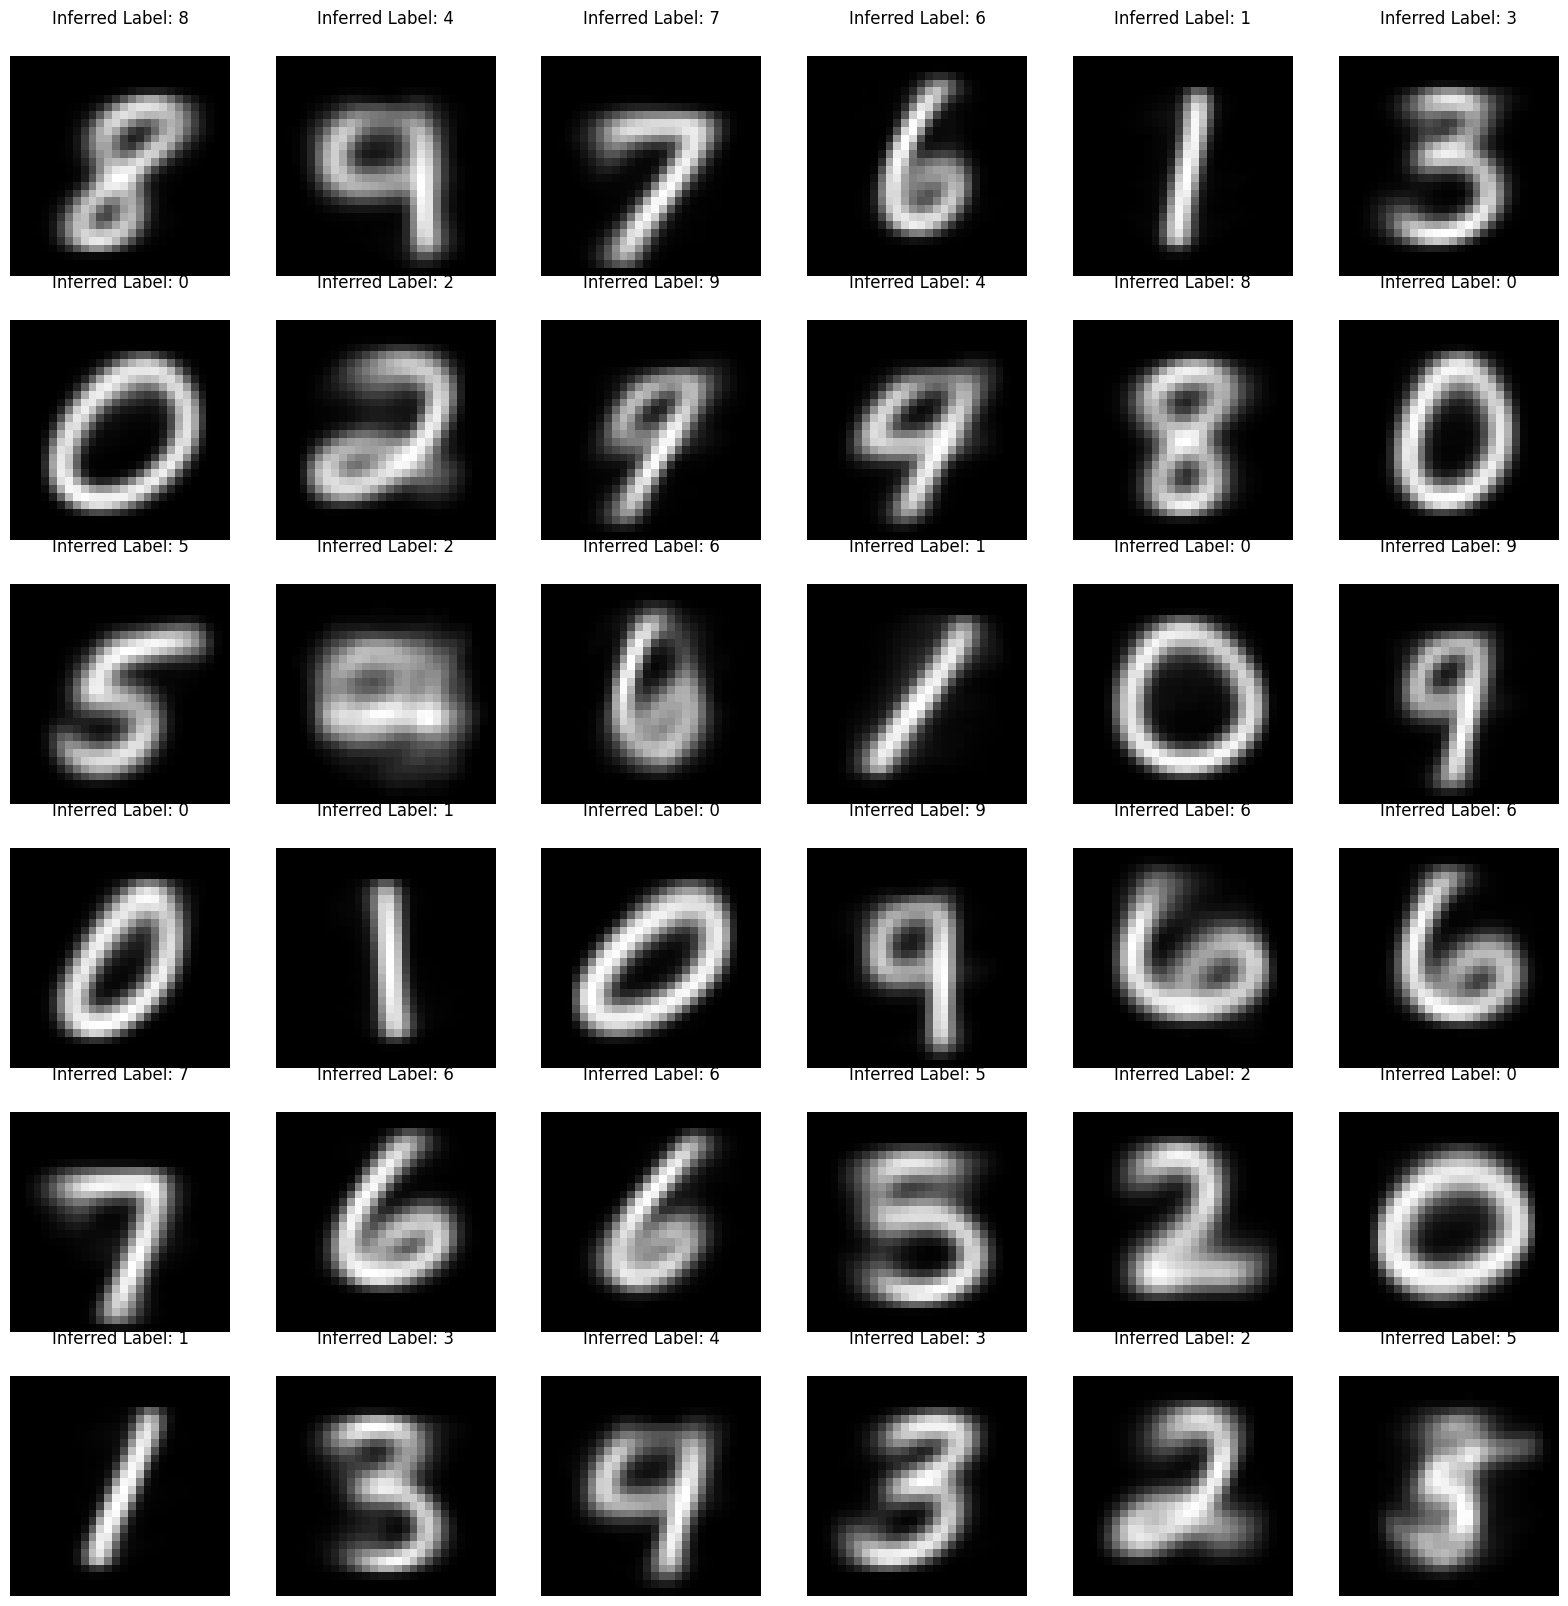

In [14]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()